In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 불러오기
img = cv2.imread("meta.jpg")  # ← 여기에 본인 이미지 파일명 넣으세요
if img is None:
    raise FileNotFoundError("이미지 파일이 없습니다. 경로와 파일명을 확인하세요.")

# BGR → RGB (matplotlib 시각화용)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [46]:
# 2. Grayscale 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [47]:
# 3. 이미지 크기 조절
resized = cv2.resize(img, None, fx=0.5, fy=0.5)

In [48]:
# 4. 이미지 회전
height, width = img.shape[:2]
center = (width // 2, height // 2)
angle = 30  # 30도 회전
scale = 1.0
M = cv2.getRotationMatrix2D(center, angle, scale)
rotated = cv2.warpAffine(img, M, (width, height))

In [49]:
# 5. 이미지 뒤집기
flipped = cv2.flip(img, 1)  # 좌우 반전

In [50]:
# 6. 이미지 자르기 (중앙 기준 사각형)
crop = img[100:300, 100:300]  # 이미지 크기에 맞게 조정

In [51]:
# 7. 정규화
gray_float = gray.astype(np.float32)
norm = cv2.normalize(gray_float, None, 0, 255, cv2.NORM_MINMAX)
norm = norm.astype(np.uint8)

In [52]:
# 8. 히스토그램 그리기
def show_histogram(image, title="Histogram"):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.figure()
    plt.title(title)
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

In [53]:
# 9. 균일화 (equalizeHist)
equalized = cv2.equalizeHist(gray)

In [54]:
# 10. CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

In [55]:
# 결과 시각화
def show_images(images, titles, cmap=None):
    n = len(images)
    plt.figure(figsize=(15, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap=cmap if titles[i].lower().startswith('gray') else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

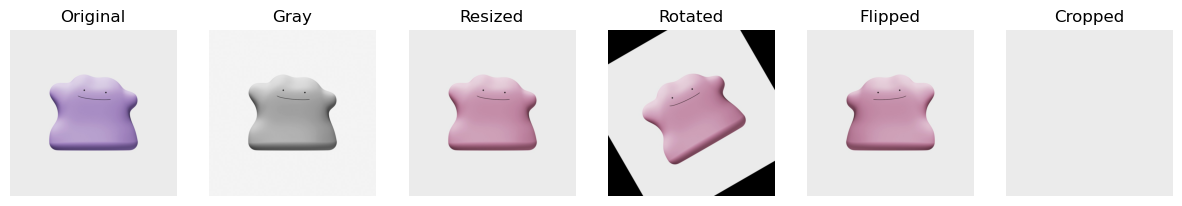

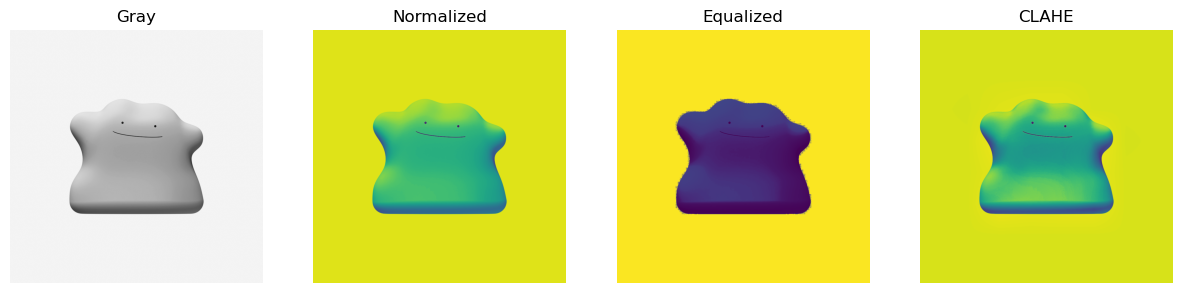

In [56]:
# 결과 보기
show_images([img_rgb, gray, resized, rotated, flipped, crop],
            ["Original", "Gray", "Resized", "Rotated", "Flipped", "Cropped"],
            cmap='gray')

show_images([gray, norm, equalized, clahe_img],
            ["Gray", "Normalized", "Equalized", "CLAHE"],
            cmap='gray')

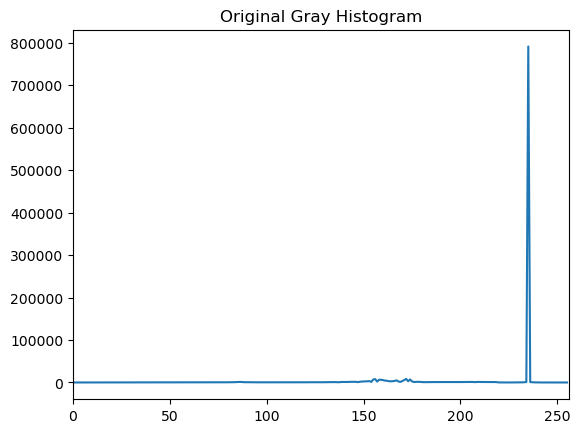

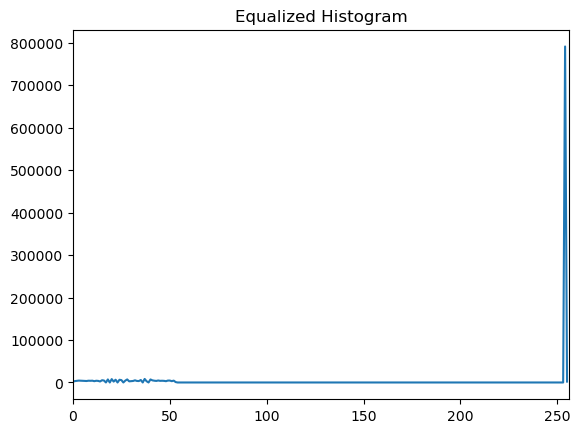

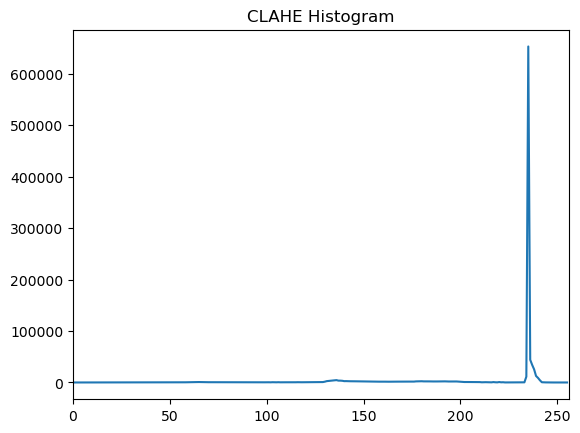

In [57]:
# 히스토그램 보기
show_histogram(gray, "Original Gray Histogram")
show_histogram(equalized, "Equalized Histogram")
show_histogram(clahe_img, "CLAHE Histogram")

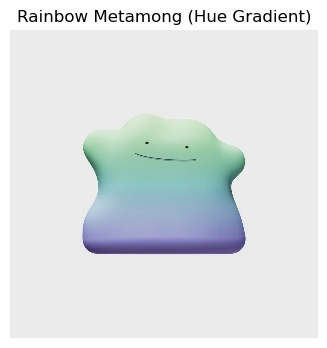

In [58]:
# 무지개 메타몽 만들기 (HSV hue 조작 방식)

# 이미지 크기 조정 (기존 img를 그대로 resize)
rainbow_base = cv2.resize(img, (300, 300))

# HSV 색공간 변환
hsv = cv2.cvtColor(rainbow_base, cv2.COLOR_BGR2HSV)

# 무지개 hue 그라디언트 만들기 (H 채널: 0 ~ 179 범위)
height, width = hsv.shape[:2]
hue_gradient = np.zeros((height, width), dtype=np.uint8)
hues = np.linspace(0, 179, height).astype(np.uint8)
for i in range(height):
    hue_gradient[i, :] = hues[i]

# H만 교체
rainbow_hsv = hsv.copy()
rainbow_hsv[..., 0] = hue_gradient

# HSV → BGR → RGB
rainbow_bgr = cv2.cvtColor(rainbow_hsv, cv2.COLOR_HSV2BGR)
rainbow_rgb = cv2.cvtColor(rainbow_bgr, cv2.COLOR_BGR2RGB)

# 시각화
plt.figure(figsize=(8, 4))
plt.imshow(rainbow_rgb)
plt.title("Rainbow Metamong (Hue Gradient)")
plt.axis('off')
plt.show()